In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from RegscorePy import mallow
import itertools

In [2]:
import os
print (os.path.abspath('.'))

/Users/apple/Desktop/学习文件/430-Applied Econometrics/项目


In [3]:
# 1:  Load the data and check its contents
train = pd.read_csv('train.csv', encoding = 'utf-8')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10884 entries, 0 to 10883
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedroom            10884 non-null  int64  
 1   bathrooms          10884 non-null  int64  
 2   area               10884 non-null  float64
 3   furnishing         10884 non-null  object 
 4   avalable_for       10884 non-null  object 
 5   address            10884 non-null  object 
 6   floor_number       10884 non-null  int64  
 7   facing             10884 non-null  object 
 8   floor_type         10884 non-null  object 
 9   gate_community     10884 non-null  object 
 10  corner_pro         10884 non-null  object 
 11  parking            10884 non-null  int64  
 12  wheelchairadption  10884 non-null  object 
 13  petfacility        10884 non-null  object 
 14  aggDur             10884 non-null  int64  
 15  noticeDur          10884 non-null  int64  
 16  lightbill          108

In [4]:
# 2a: Inspect the data
train.head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,All,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Marble,Yes,...,0,0,0,0,0,0,0,3,0.0,20000.0
1,2,2,760.0,Unfurnished,All,"Manav Silver Springs, Wagholi, , Pune, Maharas...",5,East,Vitrified,Yes,...,0,0,0,0,0,0,0,40000,0.0,14000.0
2,3,3,0.0,Semifurnished,All,"Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra",1,South-West,Vitrified,Yes,...,0,0,1,0,0,Maintenance 1/ (/ month,23000,60000,1.0,22999.0
3,1,1,628.0,Furnished,Family Only,"Dhan Residency, Wanowrie, , Pune, Maharashtra",3,East,Mosaic,Yes,...,0,0,0,0,0,0,0,40000,0.0,13000.0
4,2,2,668.0,Semifurnished,"Family , Bachelors (Men Only)","Saptsiddhi Savali Homes, Uruli Devachi, , Pune...",6,South,Polished concrete,Yes,...,0,0,0,0,0,0,0,20,0.0,7500.0


In [5]:
# 2b: Look at the data index
print(train.index)

RangeIndex(start=0, stop=10884, step=1)


In [6]:
# 2c: Check the names of variables provided
print(train.columns)

Index(['bedroom', 'bathrooms', 'area', 'furnishing', 'avalable_for', 'address',
       'floor_number', 'facing', 'floor_type', 'gate_community', 'corner_pro',
       'parking', 'wheelchairadption', 'petfacility', 'aggDur', 'noticeDur',
       'lightbill', 'powerbackup', 'propertyage', 'no_room', 'pooja_room',
       'study_room', 'others', 'servant_room', 'store_room', 'maintenance_amt',
       'brok_amt', 'deposit_amt', 'mnt_amt', 'rent'],
      dtype='object')


In [7]:
# 2d: Data dimensions
train.shape

(10884, 30)

In [8]:
#2e: Check if there are any missing observations
print(train.isnull().any())

bedroom              False
bathrooms            False
area                 False
furnishing           False
avalable_for         False
address              False
floor_number         False
facing               False
floor_type           False
gate_community       False
corner_pro           False
parking              False
wheelchairadption    False
petfacility          False
aggDur               False
noticeDur            False
lightbill            False
powerbackup          False
propertyage          False
no_room              False
pooja_room           False
study_room           False
others               False
servant_room         False
store_room           False
maintenance_amt      False
brok_amt             False
deposit_amt          False
mnt_amt              False
rent                 False
dtype: bool


In [9]:
# 3: Summary Statistics
train.describe()

,bedroom,bathrooms,area,floor_number,parking,aggDur,noticeDur,lightbill,powerbackup,no_room,pooja_room,study_room,others,servant_room,store_room,brok_amt,deposit_amt,mnt_amt,rent
count,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,1.088400e+04,10884.000000,1.088400e+04
mean,1.797868,1.779677,528.558560,3.062018,0.884693,7.423649,0.722345,0.172639,0.712422,0.750276,0.062201,0.048144,0.124495,0.032157,0.045296,7075.270764,3.670939e+04,257.493025,2.855947e+04
std,0.807328,0.832231,930.460935,2.390430,0.559457,7.670543,0.698966,0.377952,0.842667,0.432873,0.241532,0.214080,0.330160,0.176426,0.207962,17269.507644,5.589578e+04,1247.938097,1.183249e+06
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.600000e+03
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,1.050000e+04
50%,2.000000,2.000000,510.000000,3.000000,1.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+04,0.000000,1.500000e+04
75%,2.000000,2.000000,840.000000,5.000000,1.000000,11.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9000.000000,5.000000e+04,0.000000,2.100000e+04
max,22.000000,22.000000,72775.000000,9.000000,9.000000,36.000000,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,275000.000000,1.500000e+06,40000.000000,1.234568e+08


In [10]:
# createing a copy of original data of actual cleaning & feature engineering puppose
df = train.copy() 

### Problem List:
1. There is sever missing values problem, although there are no nulls in the dataset, the nulls appear as unresonable values, for example, more than 25% of the sqrt feet of the house is 0, which is impossible.
2. Some of the variable has unbalanced structure, for example the mnt-amt, the majority of the data is 0.
3. There are some extrem sample that should be deleted, for example, there is a 1.234568e+08 in rent price, which is unresonable.

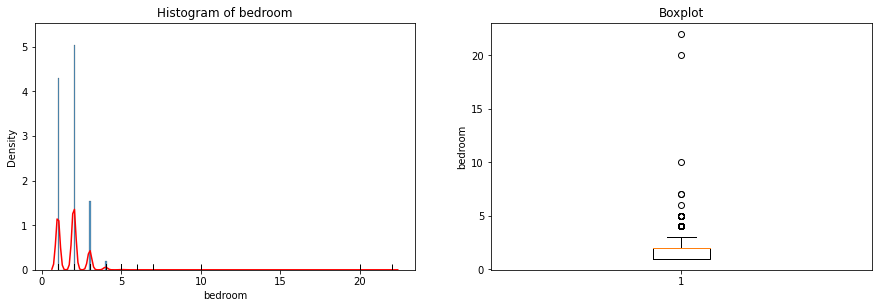

In [11]:
#1.bedroom: Number of bedrooms
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['bedroom'],stat = 'density')
sns.kdeplot(df['bedroom'], color = 'red')
sns.rugplot(df['bedroom'], color = 'black')
ax.set_title('Histogram of bedroom')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['bedroom'])
plt.ylabel('bedroom')
plt.title('Boxplot')
plt.show()

In [12]:
# According to the graphs, there are some outliers that should be romoved. So we will remove samples that has bedroom larger than 4.
print('The threashold of outliers is: ', df.bedroom.mean() + 3* df.bedroom.std())

The threashold of outliers is:  4.219853307664092


In [13]:
# Data cleaning: romove outliers
print('shape before', df.shape)
df.drop(df[df['bedroom'] >= 5].index, axis = 0, inplace = True)  
print('shape after', df.shape)

shape before (10884, 30)
shape after (10861, 30)


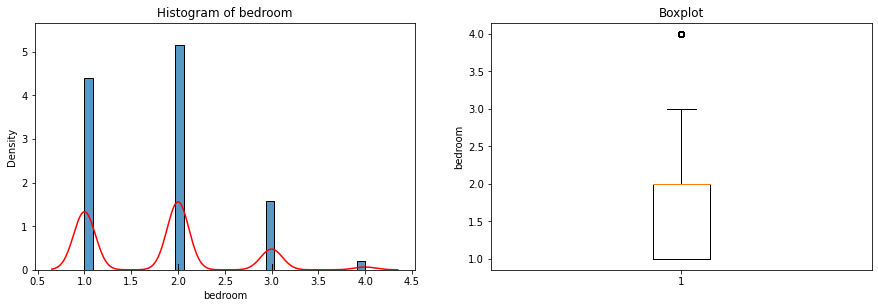

In [14]:
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['bedroom'],stat = 'density')
sns.kdeplot(df['bedroom'], color = 'red')
sns.rugplot(df['bedroom'], color = 'black')
ax.set_title('Histogram of bedroom')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['bedroom'])
plt.ylabel('bedroom')
plt.title('Boxplot')
plt.show()

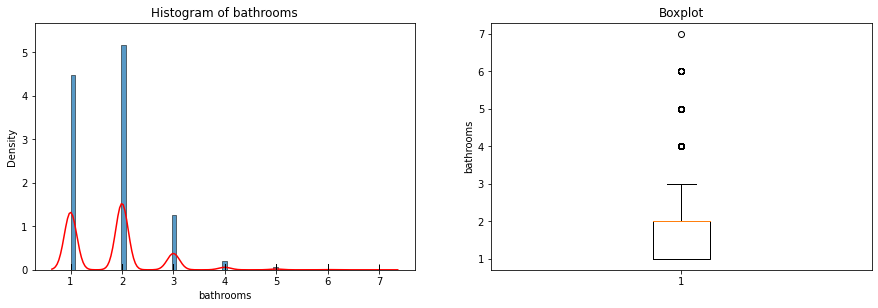

In [15]:
#2.bathrooms: Number of bathrooms
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['bathrooms'],stat = 'density')
sns.kdeplot(df['bathrooms'], color = 'red')
sns.rugplot(df['bathrooms'], color = 'black')
ax.set_title('Histogram of bathrooms')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['bathrooms'])
plt.ylabel('bathrooms')
plt.title('Boxplot')
plt.show()

In [16]:
# According to the graphs, there are some outliers that should be romoved. So we will remove samples that has bedroom larger than 4.
print('The threashold of outliers is: ', df.bathrooms.mean() + 3* df.bathrooms.std())

The threashold of outliers is:  4.095500520602953


In [17]:
# Data cleaning: romove outliers
print('shape before', df.shape)
df.drop(df[df['bathrooms'] >= 5].index, axis = 0, inplace = True)  
print('shape after', df.shape)

shape before (10861, 30)
shape after (10788, 30)


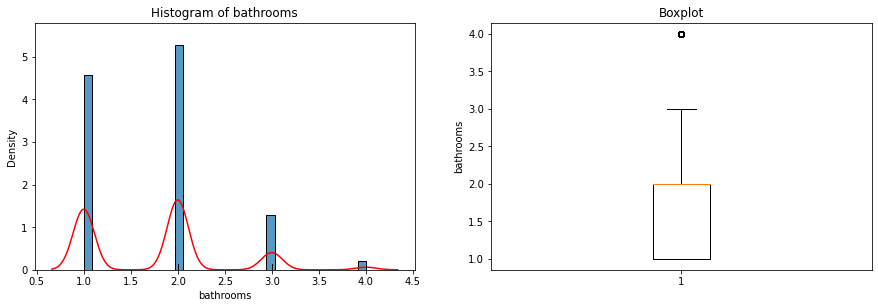

In [18]:
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['bathrooms'],stat = 'density')
sns.kdeplot(df['bathrooms'], color = 'red')
sns.rugplot(df['bathrooms'], color = 'black')
ax.set_title('Histogram of bathrooms')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['bathrooms'])
plt.ylabel('bathrooms')
plt.title('Boxplot')
plt.show()

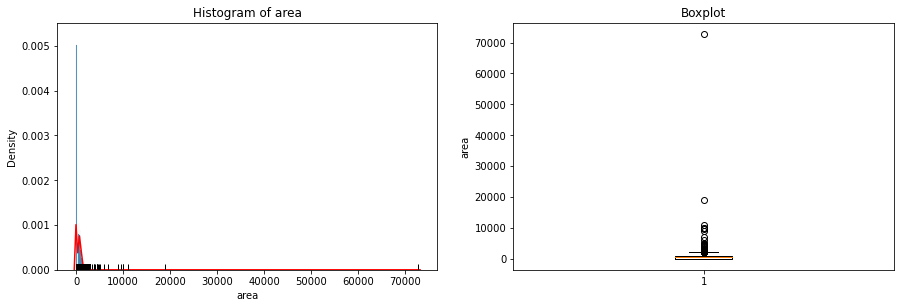

In [19]:
# 3.area: Area in sq ft
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['area'],stat = 'density')
sns.kdeplot(df['area'], color = 'red')
sns.rugplot(df['area'], color = 'black')
ax.set_title('Histogram of area')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['area'])
plt.ylabel('area')
plt.title('Boxplot')
plt.show()

In [20]:
# According to the graphs, there are some outliers that should be romoved. So we will remove samples that has bedroom larger than 4.
print('The threashold of outliers is: ', df.area.mean() + 3* df.area.std())

The threashold of outliers is:  3226.5189072447843


In [21]:
# Data cleaning: romove outliers
print('shape before', df.shape)
df.drop(df[df['area'] >= 3227].index, axis = 0, inplace = True)  
print('shape after', df.shape)

shape before (10788, 30)
shape after (10769, 30)


In [22]:
# Besides, we can find there are more than 25% of data is missing value, so we can use 
df['area'] = df['area'].replace(0, np.nan)
df.isna().sum()

bedroom                 0
bathrooms               0
area                 4003
furnishing              0
avalable_for            0
address                 0
floor_number            0
facing                  0
floor_type              0
gate_community          0
corner_pro              0
parking                 0
wheelchairadption       0
petfacility             0
aggDur                  0
noticeDur               0
lightbill               0
powerbackup             0
propertyage             0
no_room                 0
pooja_room              0
study_room              0
others                  0
servant_room            0
store_room              0
maintenance_amt         0
brok_amt                0
deposit_amt             0
mnt_amt                 0
rent                    0
dtype: int64

## We will use KNN method to replace all missing values in the end.

In [23]:
# 4.furnishing: Indicates the furnishing type
df['furnishing'].unique()

array(['Unfurnished', 'Semifurnished', 'Furnished', 'Unfurnishe'],
      dtype=object)

In [24]:
# Obviously, we can correct 'Unfurnishe' to 'Unfurnished',
# Then we will set 'Unfurnished'= 0, 'Semifurnished' = 0.5, 'Furnished' = 1
df['furnishing'] = df['furnishing'].replace('Unfurnished', 0)
df['furnishing'] = df['furnishing'].replace('Unfurnishe', 0)
df['furnishing'] = df['furnishing'].replace('Semifurnished', 0.5)
df['furnishing'] = df['furnishing'].replace('Furnished', 1)

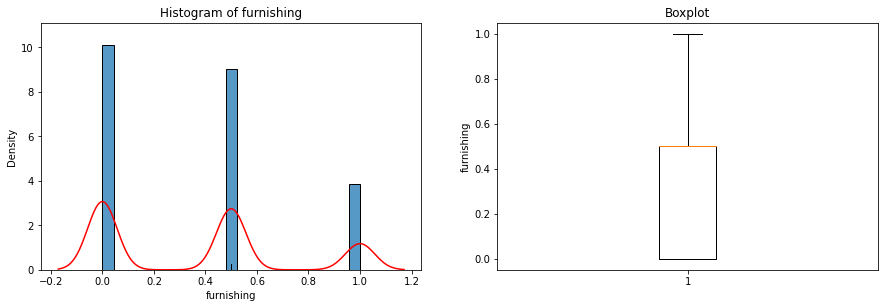

In [25]:
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['furnishing'],stat = 'density')
sns.kdeplot(df['furnishing'], color = 'red')
sns.rugplot(df['furnishing'], color = 'black')
ax.set_title('Histogram of furnishing')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['furnishing'])
plt.ylabel('furnishing')
plt.title('Boxplot')
plt.show()

In [26]:
# 5.avalable_for: house/ apartment availble for family, men , female, becholars
df['avalable_for'].unique()

array(['All', 'Family Only', 'Family , Bachelors (Men Only)',
       'Family , Bachelors (Women Only)', 'Bachelors (Men/Women)',
       'Bachelors (Women Only)', 'Bachelors (Men Only)', 'None'],
      dtype=object)

In [27]:
df['avalable_for'].value_counts()

All                                5340
Family Only                        4388
Family , Bachelors (Women Only)     446
Family , Bachelors (Men Only)       277
Bachelors (Men/Women)               119
Bachelors (Men Only)                 94
Bachelors (Women Only)               75
None                                 30
Name: avalable_for, dtype: int64

In [28]:
# Then we will set 'All'= 0, 'Family Only ' = 1, '' = 2
df['avalable_for'] = df['avalable_for'].replace('All', 0)
df['avalable_for'] = df['avalable_for'].replace('Family Only', 1)
df['avalable_for'] = df['avalable_for'].replace('Family , Bachelors (Women Only)', 2)
df['avalable_for'] = df['avalable_for'].replace('Family , Bachelors (Men Only)', 2)
df['avalable_for'] = df['avalable_for'].replace('Bachelors (Men/Women)', 2)
df['avalable_for'] = df['avalable_for'].replace('Bachelors (Men Only)', 2)
df['avalable_for'] = df['avalable_for'].replace('Bachelors (Women Only)', 2)
df['avalable_for'] = df['avalable_for'].replace('Family , Bachelors (Men Only)', 2)
df['avalable_for'] = df['avalable_for'].replace('None', 2)

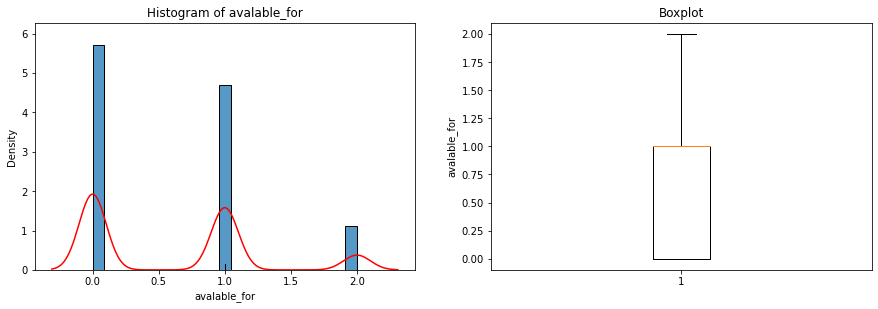

In [29]:
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['avalable_for'],stat = 'density')
sns.kdeplot(df['avalable_for'], color = 'red')
sns.rugplot(df['avalable_for'], color = 'black')
ax.set_title('Histogram of avalable_for')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['avalable_for'])
plt.ylabel('avalable_for')
plt.title('Boxplot')
plt.show()

In [30]:
# 6.address: destination of location
# In the future, we may search the address to make furthur area analysis and maybe require web crawler techniques. 
# But for now, we are not able to use this column so we have to drop it.
del df['address']

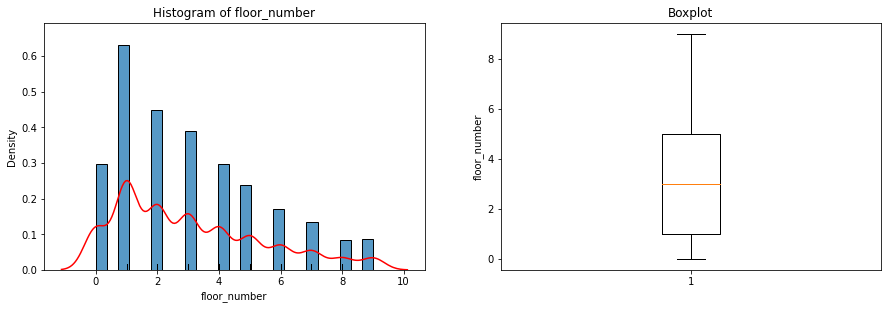

In [31]:
# 7.floor_number: Floor number of appartment
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['floor_number'],stat = 'density')
sns.kdeplot(df['floor_number'], color = 'red')
sns.rugplot(df['floor_number'], color = 'black')
ax.set_title('Histogram of floor_number')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['floor_number'])
plt.ylabel('floor_number')
plt.title('Boxplot')
plt.show()

In [32]:
# 8.facing: Direction of door (this is due to India has spritual backgroud & facing of our house is matter)
df['facing'].value_counts()

East            3914
No Direction    3497
West             999
North            701
North-East       535
South            373
North-West       268
South-East       242
South-West       240
Name: facing, dtype: int64

In [33]:
# We can find there are 33% of data is missing value, so we can use mode replacement
# Then we will set 'East'= 0, 'West' = 1, 'North' = 2, 'North-East' = 3, 'South' = 4, 'North-West' = 5
# 'South-East' = 6, 'South-West' = 7, 'No Direction' = mode direction
df['facing'] = df['facing'].replace('East', 0)
df['facing'] = df['facing'].replace('West', 1)
df['facing'] = df['facing'].replace('North', 2)
df['facing'] = df['facing'].replace('North-East', 3)
df['facing'] = df['facing'].replace('South', 4)
df['facing'] = df['facing'].replace('North-West', 5)
df['facing'] = df['facing'].replace('South-East', 6)
df['facing'] = df['facing'].replace('South-West', 7)
df['facing'] = df['facing'].replace('No Direction', np.nan)

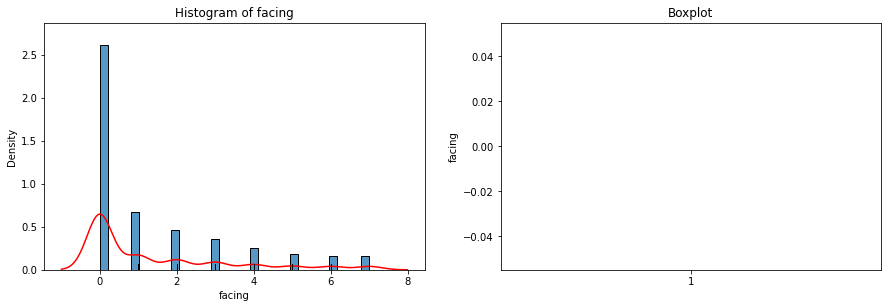

In [34]:
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['facing'],stat = 'density')
sns.kdeplot(df['facing'], color = 'red')
sns.rugplot(df['facing'], color = 'black')
ax.set_title('Histogram of facing')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['facing'])
plt.ylabel('facing')
plt.title('Boxplot')
plt.show()

In [35]:
# 9.floor_type: Types of floor material used ex.marble etc
df['floor_type'].value_counts()

Not provided         4328
Vitrified            3634
Ceramic              1029
Marble                761
Mosaic                246
Others                206
Spartex               179
Granite               160
Wood                   66
Concrete               65
Polished concrete      34
Cement                 26
Vinyl                  19
Stone                  12
IPSFinish               4
Name: floor_type, dtype: int64

In [36]:
# We can find there are 41% of data is missing value, and we think it's not significient, so we drop it.
del df['floor_type']

In [37]:
# 10.gate_community: Gate security available or not  - yes/no
# We will set 'No'= 0, 'Yes' = 1
df['gate_community'] = df['gate_community'].replace('No', 0)
df['gate_community'] = df['gate_community'].replace('Yes', 1)

Text(0.5, 1.0, 'Histogram of gate_community')

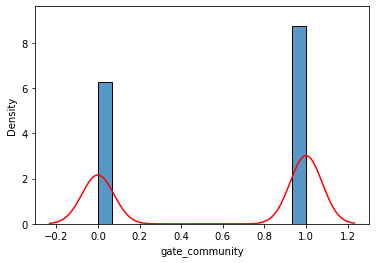

In [38]:
sns.histplot(df['gate_community'],stat = 'density')
sns.kdeplot(df['gate_community'], color = 'red')
sns.rugplot(df['gate_community'], color = 'black')
ax.set_title('Histogram of gate_community')

In [39]:
# 11.corner_pro: Corner location of road  - yes/no
# We will set 'No'= 0, 'Yes' = 1
df['corner_pro'] = df['corner_pro'].replace('No', 0)
df['corner_pro'] = df['corner_pro'].replace('Yes', 1)

Text(0.5, 1.0, 'Histogram of corner_pro')

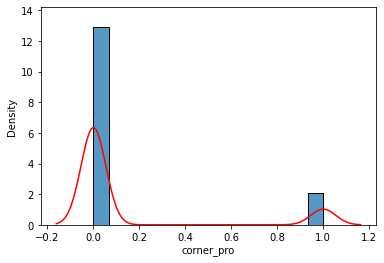

In [40]:
sns.histplot(df['corner_pro'],stat = 'density')
sns.kdeplot(df['corner_pro'], color = 'red')
sns.rugplot(df['corner_pro'], color = 'black')
ax.set_title('Histogram of corner_pro')

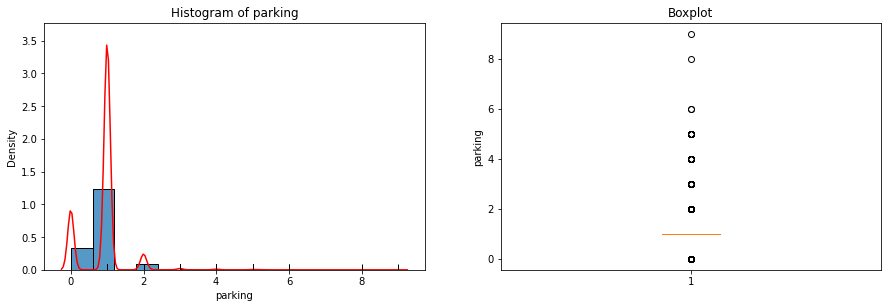

In [41]:
# 12.parking: How much vehicles can park
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['parking'],stat = 'density')
sns.kdeplot(df['parking'], color = 'red')
sns.rugplot(df['parking'], color = 'black')
ax.set_title('Histogram of parking')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['parking'])
plt.ylabel('parking')
plt.title('Boxplot')
plt.show()

In [42]:
# According to the graphs, there are some outliers that should be romoved. So we will remove samples that has parking larger than 2.6
print('The threashold of parkings is: ', df.parking.mean() + 3* df.parking.std())

The threashold of parkings is:  2.5173308454996106


In [43]:
# Data cleaning: romove outliers
print('shape before', df.shape)
df.drop(df[df['parking'] >= 3].index, axis = 0, inplace = True)  
print('shape after', df.shape)

shape before (10769, 28)
shape after (10688, 28)


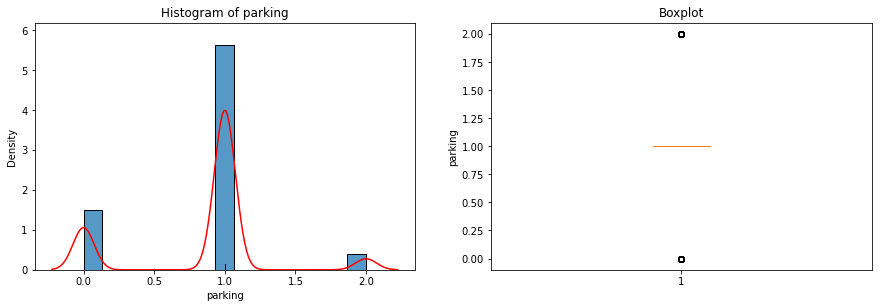

In [44]:
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['parking'],stat = 'density')
sns.kdeplot(df['parking'], color = 'red')
sns.rugplot(df['parking'], color = 'black')
ax.set_title('Histogram of parking')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['parking'])
plt.ylabel('parking')
plt.title('Boxplot')
plt.show()

In [45]:
# 13.wheelchairadption: Wheel chair Adaptaiton - yes/no
# We will set 'No'= 0, 'Yes' = 1
df['wheelchairadption'] = df['wheelchairadption'].replace('None', 0)
df['wheelchairadption'] = df['wheelchairadption'].replace('Yes', 1)

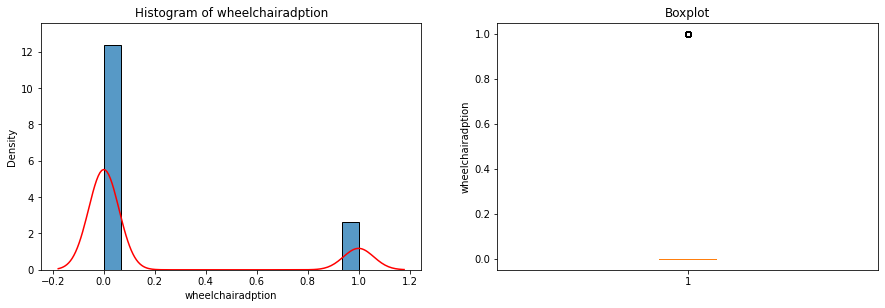

In [46]:
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['wheelchairadption'],stat = 'density')
sns.kdeplot(df['wheelchairadption'], color = 'red')
sns.rugplot(df['wheelchairadption'], color = 'black')
ax.set_title('Histogram of wheelchairadption')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['wheelchairadption'])
plt.ylabel('wheelchairadption')
plt.title('Boxplot')
plt.show()

In [47]:
# 14.petfacility: Pet-Friendly - yes/no
# We will set 'No'= 0, 'Yes' = 1
df['petfacility'] = df['petfacility'].replace('None', 0)
df['petfacility'] = df['petfacility'].replace('Yes', 1)

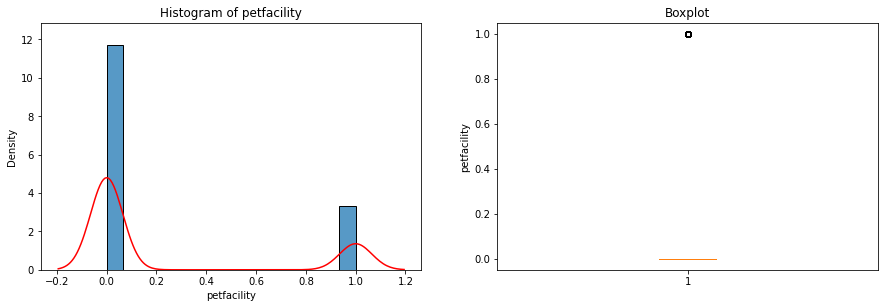

In [48]:
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['petfacility'],stat = 'density')
sns.kdeplot(df['petfacility'], color = 'red')
sns.rugplot(df['petfacility'], color = 'black')
ax.set_title('Histogram of petfacility')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['petfacility'])
plt.ylabel('petfacility')
plt.title('Boxplot')
plt.show()

In [49]:
# 19.propertyage: Property age in years
df['propertyage'].value_counts()

1 to 5 Year Old       3683
5 to 10 Year Old      3265
10+ Year Old          2156
0 to 1 Year Old       1408
Under Construction     165
NO age                  11
Name: propertyage, dtype: int64

In [50]:
print('shape before', df.shape)
df.drop(df[df['propertyage'] == 'NO age'].index, axis = 0, inplace = True)  
print('shape after', df.shape)

shape before (10688, 28)
shape after (10677, 28)


In [51]:
# We will set 'Under Construction' = 0, '0 to 1 Year Old' = 1, '1 to 5 Year Old ' = 2,
# '5 to 10 Year Old' = 3, '10+ Year Old' = 4
df['propertyage'] = df['propertyage'].replace('Under Construction', 0)
df['propertyage'] = df['propertyage'].replace('0 to 1 Year Old', 1)
df['propertyage'] = df['propertyage'].replace('1 to 5 Year Old', 2)
df['propertyage'] = df['propertyage'].replace('5 to 10 Year Old', 3)
df['propertyage'] = df['propertyage'].replace('10+ Year Old', 4)

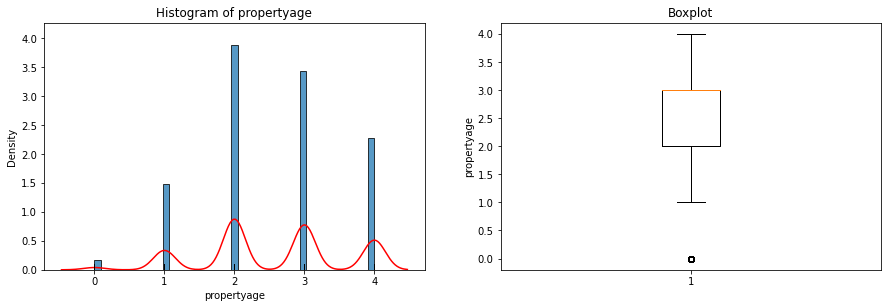

In [52]:
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['propertyage'],stat = 'density')
sns.kdeplot(df['propertyage'], color = 'red')
sns.rugplot(df['propertyage'], color = 'black')
ax.set_title('Histogram of propertyage')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['propertyage'])
plt.ylabel('propertyage')
plt.title('Boxplot')
plt.show()

In [53]:
# 26.maintenance_amt: Building maintence charges (monthly)
# We have to drop it.
del df['maintenance_amt']

In [54]:
# 30.rent(Target Variable): It indicates the monthly rent in INR.
print('shape before', df.shape)
df.drop(df[df['rent'] >= 123456789].index, axis = 0, inplace = True) # this values is added by purpose while doing data cleaning 
print('shape after', df.shape)

shape before (10677, 27)
shape after (10676, 27)


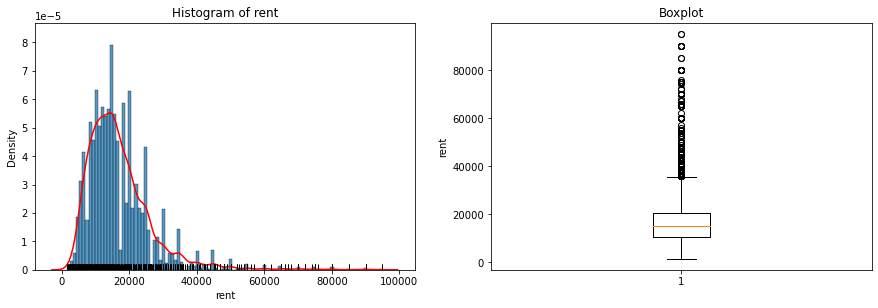

In [55]:
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['rent'],stat = 'density')
sns.kdeplot(df['rent'], color = 'red')
sns.rugplot(df['rent'], color = 'black')
ax.set_title('Histogram of rent')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['rent'])
plt.ylabel('rent')
plt.title('Boxplot')
plt.show()

In [56]:
#Check for Linear Transformation
bc_deflator,lambda_deflator  = stats.boxcox(df['rent'])
print('lambda =', lambda_deflator,', which approximately equals to 0.')

lambda = 0.032019808930560174 , which approximately equals to 0.


In [57]:
df['rent']=np.log(df['rent'])

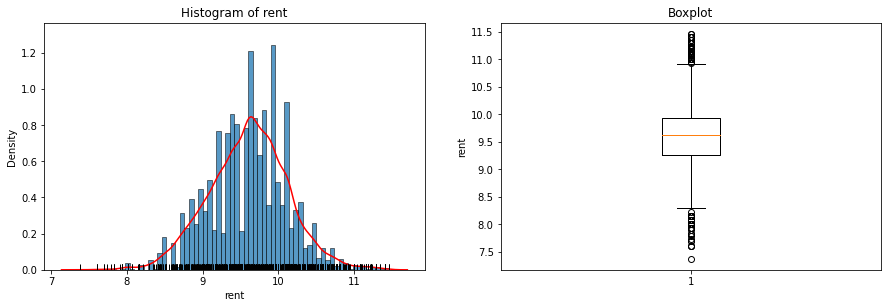

In [58]:
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['rent'],stat = 'density')
sns.kdeplot(df['rent'], color = 'red')
sns.rugplot(df['rent'], color = 'black')
ax.set_title('Histogram of rent')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['rent'])
plt.ylabel('rent')
plt.title('Boxplot')
plt.show()

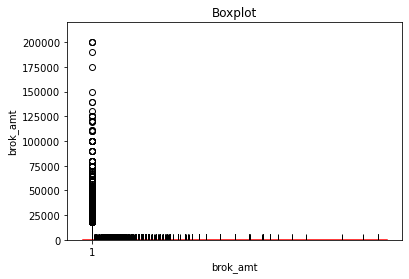

In [59]:
# 27.brok_amt: Real-estate charges in INR(once in agreement duration)
ax=fig.add_subplot(2,2,1) 
sns.histplot(df['brok_amt'],stat = 'density')
sns.kdeplot(df['brok_amt'], color = 'red')
sns.rugplot(df['brok_amt'], color = 'black')
ax.set_title('Histogram of brok_amt')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['brok_amt'])
plt.ylabel('brok_amt')
plt.title('Boxplot')
plt.show()

In [60]:
#Check for Linear Transformation
df['brok_amt'] = df['brok_amt'].replace(0, 0.0000001)
bc_deflator,lambda_deflator  = stats.boxcox(df['brok_amt'])
print('lambda =', lambda_deflator,', which approximately equals to 0.')

lambda = -0.12058913684978724 , which approximately equals to 0.


In [61]:
df['brok_amt'] = np.log(df['brok_amt'])
print('The threashold of outliers is: ', df.brok_amt.mean() + 3* df.brok_amt.std())
print('shape before', df.shape)
df.drop(df[df['brok_amt'] > (df.brok_amt.mean() + 3* df.brok_amt.std())].index, axis = 0, inplace = True)  
print('shape after', df.shape)

The threashold of outliers is:  25.165628263763043
shape before (10676, 27)
shape after (10676, 27)


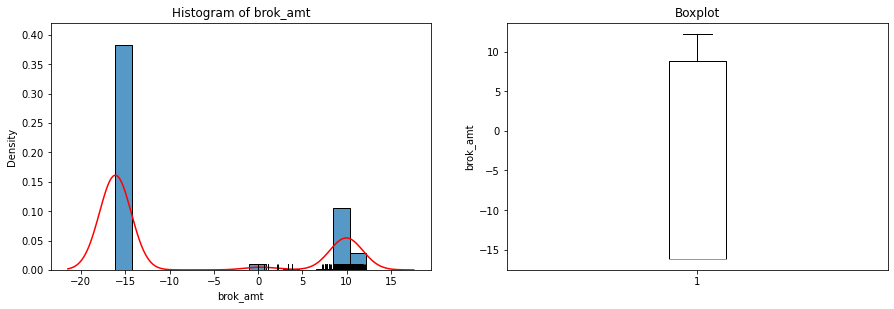

In [62]:
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['brok_amt'],stat = 'density')
sns.kdeplot(df['brok_amt'], color = 'red')
sns.rugplot(df['brok_amt'], color = 'black')
ax.set_title('Histogram of brok_amt')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['brok_amt'])
plt.ylabel('brok_amt')
plt.title('Boxplot')
plt.show()

<Figure size 1080x720 with 0 Axes>

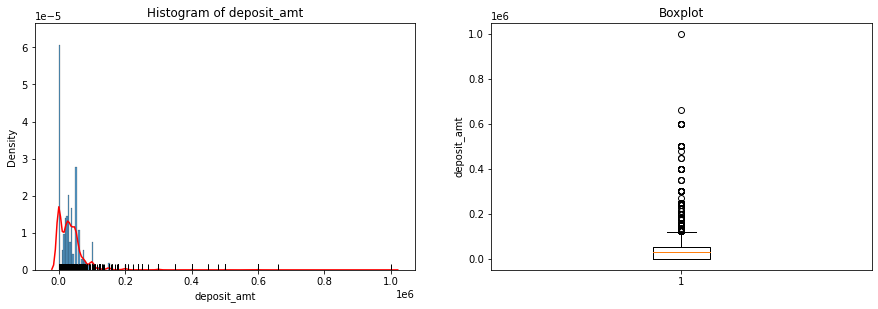

In [63]:
# 28.deposit_amt: Security amount of owner in INR. This will refunded as per agreement (once in agreement duration)

fig=plt.figure(figsize=(15,10))
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['deposit_amt'],stat = 'density')
sns.kdeplot(df['deposit_amt'], color = 'red')
sns.rugplot(df['deposit_amt'], color = 'black')
ax.set_title('Histogram of deposit_amt')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['deposit_amt'])
plt.ylabel('deposit_amt')
plt.title('Boxplot')
plt.show()

In [64]:
#Check for Linear Transformation
df['deposit_amt'] = df['deposit_amt'].replace(0, 0.0000001)
bc_deflator,lambda_deflator  = stats.boxcox(df['deposit_amt'])
print('lambda =', lambda_deflator,', which approximately equals to 0.')

lambda = 0.1636879374078513 , which approximately equals to 0.


In [65]:
df['deposit_amt'] = np.log(df['deposit_amt'])
print('The threashold of outliers is: ', df.deposit_amt.mean() + 3* df.deposit_amt.std())
print('shape before', df.shape)
df.drop(df[df['deposit_amt'] > (df.deposit_amt.mean() + 3* df.deposit_amt.std())].index, axis = 0, inplace = True)  
print('shape after', df.shape)

The threashold of outliers is:  31.27615724031372
shape before (10676, 27)
shape after (10676, 27)


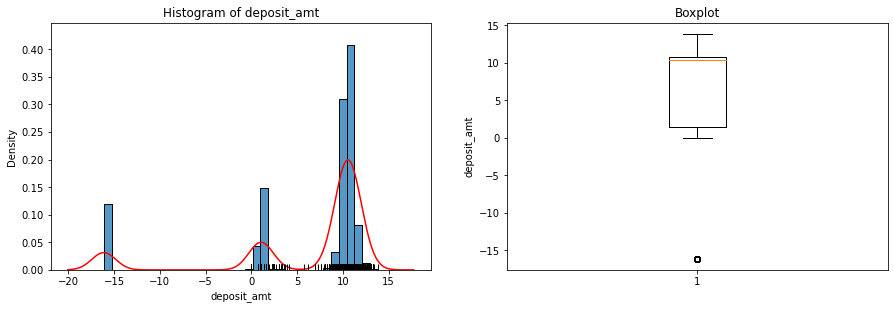

In [66]:
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['deposit_amt'],stat = 'density')
sns.kdeplot(df['deposit_amt'], color = 'red')
sns.rugplot(df['deposit_amt'], color = 'black')
ax.set_title('Histogram of deposit_amt')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['deposit_amt'])
plt.ylabel('deposit_amt')
plt.title('Boxplot')
plt.show()

<Figure size 1080x720 with 0 Axes>

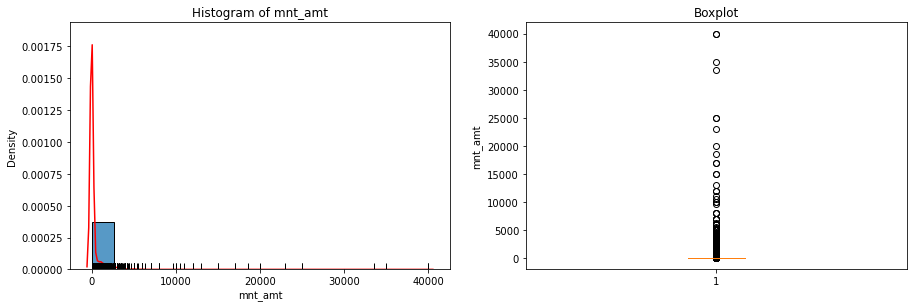

In [67]:
# 29.mnt_amt: Building maintence charges (monthly)

fig=plt.figure(figsize=(15,10))
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['mnt_amt'],stat = 'density')
sns.kdeplot(df['mnt_amt'], color = 'red')
sns.rugplot(df['mnt_amt'], color = 'black')
ax.set_title('Histogram of mnt_amt')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['mnt_amt'])
plt.ylabel('mnt_amt')
plt.title('Boxplot')
plt.show()

In [68]:
#Check for Linear Transformation
df['mnt_amt'] = df['mnt_amt'].replace(0, 0.0000001)
bc_deflator,lambda_deflator  = stats.boxcox(df['mnt_amt'])
print('lambda =', lambda_deflator,', which approximately equals to 0.')

lambda = -0.2585959415397986 , which approximately equals to 0.


In [69]:
df['mnt_amt'] = np.log(df['mnt_amt'])
print('The threashold of outliers is: ', df.mnt_amt.mean() + 3* df.mnt_amt.std())
print('shape before', df.shape)
df.drop(df[df['mnt_amt'] > (df.mnt_amt.mean() + 3* df.mnt_amt.std())].index, axis = 0, inplace = True)  
print('shape after', df.shape)

The threashold of outliers is:  12.761672189200956
shape before (10676, 27)
shape after (10676, 27)


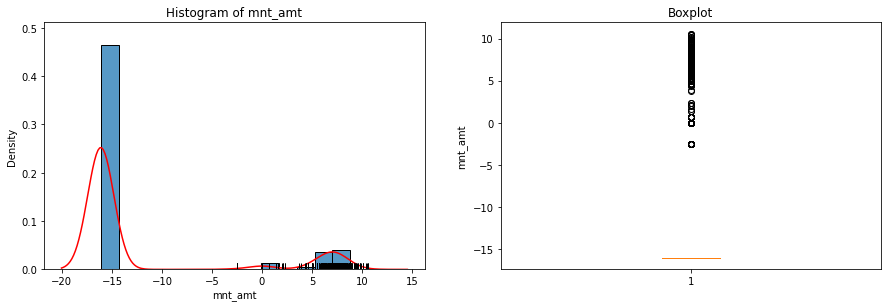

In [70]:
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(df['mnt_amt'],stat = 'density')
sns.kdeplot(df['mnt_amt'], color = 'red')
sns.rugplot(df['mnt_amt'], color = 'black')
ax.set_title('Histogram of mnt_amt')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(df['mnt_amt'])
plt.ylabel('mnt_amt')
plt.title('Boxplot')
plt.show()

## KNN method to replace all missing values.

In [71]:
from sklearn.impute import KNNImputer

# knn imputer uses 5 as a default
imputer = KNNImputer(n_neighbors=5)

knn_df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

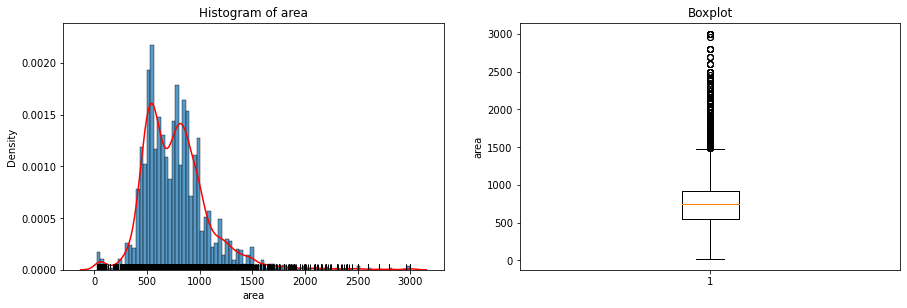

In [72]:
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(knn_df['area'],stat = 'density')
sns.kdeplot(knn_df['area'], color = 'red')
sns.rugplot(knn_df['area'], color = 'black')
ax.set_title('Histogram of area')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(knn_df['area'])
plt.ylabel('area')
plt.title('Boxplot')
plt.show()

In [73]:
#Check for Linear Transformation
bc_deflator,lambda_deflator  = stats.boxcox(knn_df['area'])
print('lambda =', lambda_deflator,', which approximately equals to 0.5')

lambda = 0.4400390204005366 , which approximately equals to 0.5


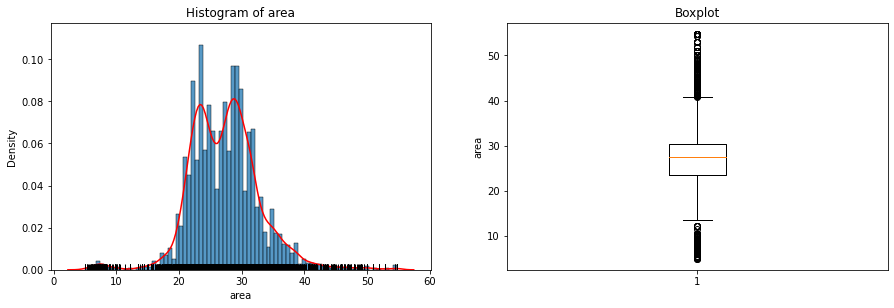

In [74]:
knn_df['area'] = knn_df['area']**0.5
fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(2,2,1) 
sns.histplot(knn_df['area'],stat = 'density')
sns.kdeplot(knn_df['area'], color = 'red')
sns.rugplot(knn_df['area'], color = 'black')
ax.set_title('Histogram of area')

ax=fig.add_subplot(2,2,2) 
plt.boxplot(knn_df['area'])
plt.ylabel('area')
plt.title('Boxplot')
plt.show()

In [75]:
knn_df.describe()

,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,gate_community,corner_pro,parking,...,no_room,pooja_room,study_room,others,servant_room,store_room,brok_amt,deposit_amt,mnt_amt,rent
count,10676.000000,10676.000000,10676.000000,10676.000000,10676.000000,10676.000000,10676.000000,10676.000000,10676.000000,10676.000000,...,10676.000000,10676.000000,10676.000000,10676.000000,10676.000000,10676.000000,10676.000000,10676.000000,10676.000000,10676.000000
mean,1.770139,1.743818,27.333476,0.363900,0.600693,3.070813,1.624073,0.582709,0.138629,0.853878,...,0.757493,0.059667,0.045710,0.122143,0.024260,0.045148,-9.091958,6.201550,-12.342163,9.604062
std,0.722468,0.718465,5.665197,0.365201,0.657064,2.388585,1.775504,0.493135,0.345575,0.478292,...,0.428619,0.236879,0.208865,0.327466,0.153863,0.207638,11.419195,8.358202,8.367945,0.519951
min,1.000000,1.000000,4.929503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.118096,-16.118096,-16.118096,7.377759
25%,1.000000,1.000000,23.452079,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.118096,1.386294,-16.118096,9.259131
50%,2.000000,2.000000,27.386128,0.500000,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.118096,10.308953,-16.118096,9.615805
75%,2.000000,2.000000,30.413813,0.500000,1.000000,5.000000,2.800000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.853665,10.819778,-16.118096,9.928180
max,4.000000,4.000000,54.772256,1.000000,2.000000,9.000000,7.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.206073,13.815511,10.596635,11.461632


In [76]:
knn_df.to_csv('train3.csv')

In [173]:
from BorutaShap import BorutaShap
df1 = knn_df.sample(n = 2000).reset_index()
del df1['index']
df1
x = df1.iloc[:2000,:-1]
y = df1.iloc[:2000,-1]

In [174]:
import statsmodels.stats.outliers_influence as smo
resultf = smf.ols('rent ~ bedroom  + area + propertyage + brok_amt + furnishing', data = df1).fit(cov_type = 'HC0')
reset_out_model = smo.reset_ramsey(res = resultf, degree = 2)
reset_out_model

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.4335358069357178, p=0.2313306448004103, df_denom=1.99e+03, df_num=1>

In [175]:
df1.to_csv('train5.csv')

Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
Feature_Selector.fit(X=x, y=y, n_trials=50, random_state=0)
Feature_Selector.plot(which_features='all')

In [78]:
results1 = smf.ols('rent ~ bedroom + deposit_amt + area + propertyage + brok_amt + furnishing', data = df1).fit()

In [79]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2894.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:10:36   Log-Likelihood:                -3009.5
No. Observations:               10676   AIC:                             6033.
Df Residuals:                   10669   BIC:                             6084.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.2985      0.019    445.331      0.000       8.262       8.335
bedroom         0.3276      0.007     48.952      0.000       0.315       0.341
deposit_amt     0.0005      0.000      1.412      0.158      -0.000       0.001
area            0.0206      0.001     24.015      0.000       0.019       0.022
propertyage     0.0434      0.003     13.628      0.000       0.037       0.050
brok_amt        0.0071      0.000     24.757      0.000       0.007       0.008
furnishing      0.3144      0.009     35.573      0.000       0.297       0.332
==============================================================================
Omnibus:                     1386.187   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4572.525
Skew:                          -0.660   Prob(JB):                         0.00
Kurtosis:                       5.922   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
df = df1[['rent','bedroom','deposit_amt','area','brok_amt','propertyage','furnishing']].copy()

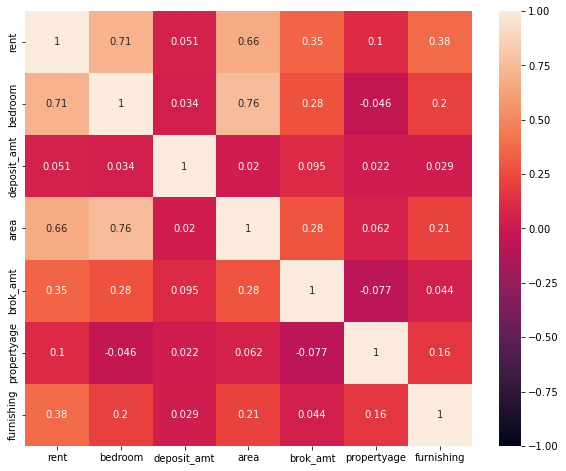

In [82]:
plt.figure(figsize = (10,8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [90]:
import statsmodels.stats.outliers_influence as smo
resultf = smf.ols('rent ~ bedroom  + area + propertyage + brok_amt + furnishing', data = df).fit(cov_type = 'HC0')
reset_out_model = smo.reset_ramsey(res = resultf, degree = 2)
reset_out_model

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=63.98290671448128, p=1.38496855768124e-15, df_denom=1.07e+04, df_num=1>